In [1]:
# ###########################################################################################################################
# This project is part of Springboard Data Science Track Career Track for data visualization and exploratory data Analysis  #
# in python.  
#
# This projects uses the data downloaded from 'https://www.divvybikes.com/' in the form of .csv files. for the years        #
# 2014
#
# The csv files are combined using Pandas and glob
#                                                                                                                           #
#                                                                                                                           #
#                                                                                                                           #
# # ########################################################################################################################
 

### Combining csv files for 2014 and create new dataframe trips_2014

In [102]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [38]:
#print(glob.glob('Divvy_Trips_2014*.csv'))


In [4]:
%%time

trips_2014=pd.concat([pd.read_csv(f,parse_dates=['starttime','stoptime']) for f in glob.glob("Divvy_Trips_2014*.csv")],ignore_index=True)


Wall time: 9min 18s


# data for 2014

In [5]:
trips_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454634 entries, 0 to 2454633
Data columns (total 12 columns):
trip_id              int64
starttime            datetime64[ns]
stoptime             datetime64[ns]
bikeid               int64
tripduration         int64
from_station_id      int64
from_station_name    object
to_station_id        int64
to_station_name      object
usertype             object
gender               object
birthyear            float64
dtypes: datetime64[ns](2), float64(1), int64(5), object(4)
memory usage: 224.7+ MB


In [6]:
trips_2014 = trips_2014[['starttime','tripduration','usertype','gender','birthyear']]

In [7]:
def get_null_values(df):
    null_columns=df.columns[df.isnull().any()]
    
    return df[null_columns].isnull().sum()
    

In [8]:
def print_rows_With_null_value(df):
    df1 = df[df.isnull().any(axis=1)]
    
    return(df1.head())
    

In [9]:
#Converting starttime,to get year,month ,week,hour


def get_startttime_break_up(df):
    date = np.array(list(map(lambda x: (x.year, x.month, x.week, x.dayofweek, x.hour), df['starttime'])))
    df['year']=date[:,0]
    df['month']=date[:,1]
    df['week']=date[:,2]
    df['day']=date[:,3]
    df['hour'] = date[:, 4]
    df['Trip_Min'] = df['tripduration']/60.0
    df['Age'] = df['year']-df['birthyear']
    
    return df


In [10]:
new_2014=get_startttime_break_up(trips_2014)


In [11]:
get_null_values(new_2014)

gender       791280
birthyear    791216
Age          791216
dtype: int64

## Lets Drop rows containing null Values

In [12]:
new_Df_2014=new_2014.dropna()


In [1]:
riders =new_Df_2014.usertype.value_counts().sort_values(ascending=False)
riders

NameError: name 'new_Df_2014' is not defined

In [86]:
customer_data=new_Df_2014[new_Df_2014['usertype']=='Customer']

In [87]:
subscriber_data=new_Df_2014[new_Df_2014['usertype']=='Subscriber']

In [146]:
#subscriber_data.head()

In [89]:
subscriber_data.describe()

,tripduration,birthyear,year,month,week,day,hour,Trip_Min,Age
count,1.663185e+06,1.663185e+06,1663185.0,1.663185e+06,1.663185e+06,1.663185e+06,1.663185e+06,1.663185e+06,1.663185e+06
mean,7.164565e+02,1.978596e+03,2014.0,7.396587e+00,3.050228e+01,2.711406e+00,1.371232e+01,1.194094e+01,3.540411e+01
std,1.222131e+03,1.045830e+01,0.0,2.502356e+00,1.091212e+01,1.883875e+00,4.882956e+00,2.036884e+01,1.045830e+01
min,6.000000e+01,1.898000e+03,2014.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.600000e+01
25%,3.580000e+02,1.973000e+03,2014.0,6.000000e+00,2.300000e+01,1.000000e+00,9.000000e+00,5.966667e+00,2.800000e+01
50%,5.740000e+02,1.982000e+03,2014.0,7.000000e+00,3.100000e+01,3.000000e+00,1.500000e+01,9.566667e+00,3.200000e+01
75%,9.070000e+02,1.986000e+03,2014.0,9.000000e+00,3.900000e+01,4.000000e+00,1.700000e+01,1.511667e+01,4.100000e+01
max,8.594200e+04,1.998000e+03,2014.0,1.200000e+01,5.200000e+01,6.000000e+00,2.300000e+01,1.432367e+03,1.160000e+02


# Lets remove the outliers of Age and Min Trip Duration
##Lets consider Trip Duration greater than 30 Min


In [148]:
mask1=((subscriber_data.Trip_Min > 30) & (subscriber_data.Age < 100))

subscriber_data= subscriber_data[mask1]

subscriber_data.describe()

,tripduration,birthyear,year,month,week,day,hour,Trip_Min,Age
count,32693.000000,32693.000000,32693.0,32693.000000,32693.000000,32693.000000,32693.000000,32693.000000,32693.000000
mean,3928.942862,1978.822133,2014.0,7.127703,29.404704,3.263604,14.293121,65.482381,35.177867
std,7636.901556,10.337192,0.0,2.096517,9.133923,1.996987,4.429782,127.281693,10.337192
min,1801.000000,1930.000000,2014.0,1.000000,1.000000,0.000000,0.000000,30.016667,16.000000
25%,1917.000000,1974.000000,2014.0,6.000000,23.000000,2.000000,11.000000,31.950000,28.000000
50%,2130.000000,1982.000000,2014.0,7.000000,29.000000,3.000000,15.000000,35.500000,32.000000
75%,2716.000000,1986.000000,2014.0,9.000000,36.000000,5.000000,18.000000,45.266667,40.000000
max,85942.000000,1998.000000,2014.0,12.000000,52.000000,6.000000,23.000000,1432.366667,84.000000


# Lets Categorize the data based on Seasons

In [108]:

spring = subscriber_data['month'].isin([3,4,5])
spring_df= subscriber_data[spring]


In [109]:
Summer = subscriber_data['month'].isin([6,7,8])
summer_df = subscriber_data[Summer]

In [110]:
fall = subscriber_data['month'].isin([9,10,11])
fall_df = subscriber_data[fall]

In [111]:
winter = subscriber_data['month'].isin([12,1,2])
winter_df = subscriber_data[winter]

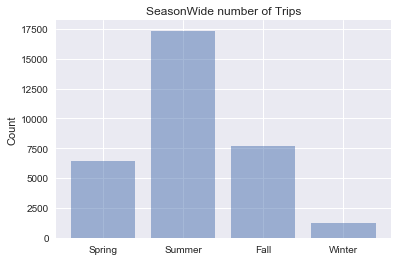

In [116]:
labels = ('Spring','Summer','Fall','Winter')
y_pos = np.arange(len(labels))
seasons = [len(spring_df),len(summer_df),len(fall_df),len(winter_df)]
plt.bar(y_pos,seasons,align='center',alpha=0.5)
plt.xticks(y_pos,labels)
plt.ylabel('Count')
plt.title('SeasonWide number of Trips')
plt.show()


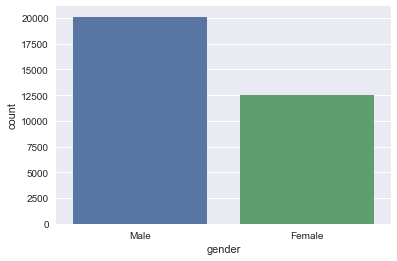

In [117]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="gender", data=subscriber_data)

# Stations.json file contains the geographical data about each station location and number of docking points at each station as of 2018
.
### Here the latitude longitude data for start and end stations is appended along with number of docking ports at each station.

In [ ]:
import json
from pandas.io.json import json_normalize


In [22]:
json_df = pd.read_json('stations.json')
json_df.head()

,executionTime,stationBeanList
0,2018-08-19 03:45:31,"{'id': 2, 'stationName': 'Buckingham Fountain'..."
1,2018-08-19 03:45:31,"{'id': 3, 'stationName': 'Shedd Aquarium', 'av..."
2,2018-08-19 03:45:31,"{'id': 4, 'stationName': 'Burnham Harbor', 'av..."
3,2018-08-19 03:45:31,"{'id': 5, 'stationName': 'State St & Harrison ..."
4,2018-08-19 03:45:31,"{'id': 6, 'stationName': 'Dusable Harbor', 'av..."


In [23]:
loc=[]
for index,row in json_df.iterrows():
    t1=json_normalize(row['stationBeanList'])
    loc.append(t1)
loc_df = pd.concat(loc)
   
loc_df.head()

NameError: name 'json_normalize' is not defined

In [ ]:
#lets take only required columns such as latitude,longitude and totalDocks

In [ ]:
loc_df[['id','latitude','longitude','totalDocks']]
loc_df.head(5)

In [ ]:

code_dict={} # dictionary with station id as key and latitude,longitude as values
doc_dict={} #dictionary with station id as key and number of docking ports as column

for a in zip(loc_df.id,loc_df.latitude,loc_df.longitude,loc_df.totalDocks):
    code_dict[a[0]]=((a[1],a[2]))
    doc_dict[a[0]]=((a[3]))
    
code_dict

In [ ]:
subscriber_data['Total_Docks']=subscriber_data['from_station_id'].map(doc_dict)


In [ ]:
subscriber_data['From_stn_loc']=subscriber_data['from_station_id'].map(code_dict)
subscriber_data['To_stn_loc']=subscriber_data['to_station_id'].map(code_dict)



In [ ]:
null_columns=subscriber_data.columns[subscriber_data.isnull().any()]
subscriber_data[null_columns].isnull().sum()


In [ ]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans(total_trips)[1:10]

In [ ]:
# can observe that there are null values in above dataset because certain stations are not in operation as per 'station.json ''
# which is recent recorded data

In [ ]:
total_df_locs=subscriber_data.dropna()
total_df_locs.head()

In [ ]:
total_df_locs.info()